Amanda Rodgers
July 18, 2024
Anti-money laundering Project

In [ ]:
# Dataset: https://www.kaggle.com/datasets/anshankul/ibm-amlsim-example-dataset?select=transactions.csv
# Tutorial: https://medium.com/@jasonclwu/network-analysis-for-anti-money-laundering-with-python-ad981792a947
# Github: https://github.com/jasonclwu/202209_AML_Network_Analysis/blob/main/AML_Network_Analysis.ipynb

In [16]:
# Import libraries
import pandas as pd
import networkx as nx
from pyvis import network as net
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
# Create df with dataset
txn_small = pd.read_csv('transactions.csv', usecols=['SENDER_ACCOUNT_ID','RECEIVER_ACCOUNT_ID','TX_AMOUNT'], dtype='object')
txn_small['TX_AMOUNT'] = txn_small['TX_AMOUNT'].astype(float)
txn_small

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_AMOUNT
0,6456,9069,465
1,7516,9543,565
2,2445,9356,599
3,2576,4617,466
4,3524,1773,406
...,...,...,...
1323229,3733,8051,113
1323230,2536,8732,460
1323231,1466,8586,469
1323232,1451,3849,562


<h2>Sum transaction amounts for each node pair</h2>

In [3]:
# Form nodes and edges by grouping by account numbers with a count of transactions and sum of amounts
# Money came from source account and target is the account it went to
# Create new columns agg_txn_count(number of transactions) and agg_txn_amt (sum of all transactions)
edge_small = txn_small.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':['count','sum']})
edge_small.columns = ['source','target','agg_txn_count','agg_txn_amt']
edge_small

,source,target,agg_txn_count,agg_txn_amt
0,1,884,24,"4,219"
1,10,8317,21,"2,003"
2,10,8520,21,"2,003"
3,100,3472,18,978
4,100,9954,18,978
...,...,...,...,...
68942,9999,9866,19,"6,035"
68943,9999,9981,19,"6,035"
68944,9999,9982,19,"6,035"
68945,9999,9985,19,"6,035"


In [11]:
# Make df smaller for faster processing
first_5000_rows_df = edge_small.head(5000)
first_5000_rows_df

,source,target,agg_txn_count,agg_txn_amt
0,1,884,24,"4,219"
1,10,8317,21,"2,003"
2,10,8520,21,"2,003"
3,100,3472,18,978
4,100,9954,18,978
...,...,...,...,...
4995,2121,8634,22,467
4996,2121,9388,22,467
4997,2121,9448,22,467
4998,2121,9968,22,467


<h2>Construct Network with NetworkX</h2>

In [17]:
# Create graph network with networkX
G = nx.from_pandas_edgelist(first_5000_rows_df, source='source', target='target')

In [5]:
# Access node and edge information from G, variable that stores graph
# Show first five nodes of graph, pattern is source, target, source, target, source, target
list(G.nodes)[0:5]

['1', '884', '10', '8317', '8520']

In [6]:
# Show the first 5 edge of G
# Shows ('target', 'source')
list(G.edges)[0:5]

[('1', '884'),
 ('884', '7331'),
 ('884', '7675'),
 ('884', '9862'),
 ('10', '8317')]

In [7]:
# Show the first 5 edge of G with all attributes with data=True, there are no attributes in this case
list(G.edges(data=True))[0:5]

[('1', '884', {}),
 ('884', '7331', {}),
 ('884', '7675', {}),
 ('884', '9862', {}),
 ('10', '8317', {})]

In [8]:
# Show the first 5 nodes of G with all attributes with data=True, there are no attributes in this case
list(G.nodes(data=True))[0:5]

[('1', {}), ('884', {}), ('10', {}), ('8317', {}), ('8520', {})]

<h2>Various network layouts</h2>

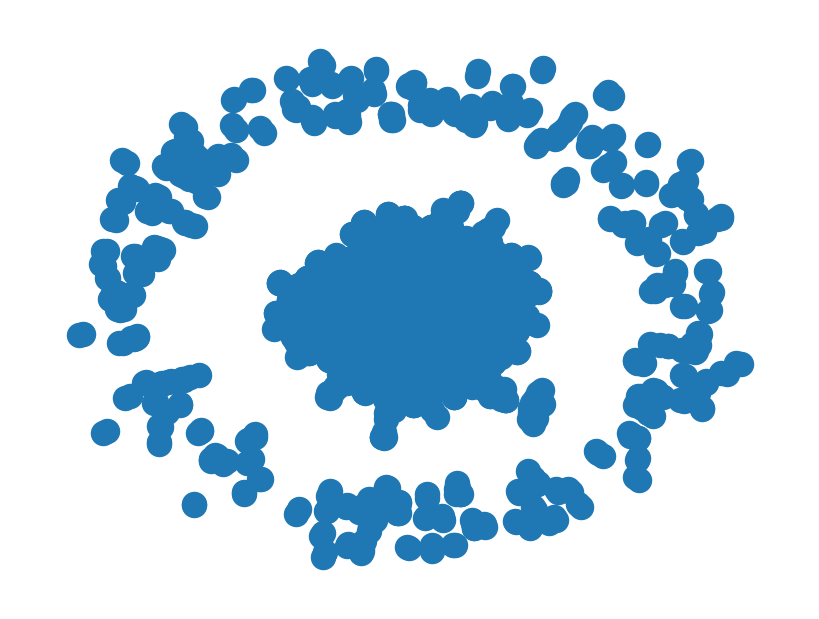

In [25]:
# Networkx Default Layout
# Create a network graph using networkx
plt.figure(figsize=(8,6))
nx.draw(G)
plt.show()

In [24]:
# Visualize the network graph with pyvis.
import networkx as nx
from pyvis.network import Network



1_pyvis_default.html


AttributeError: 'NoneType' object has no attribute 'render'

In [27]:
# Debug: Print the graph information
print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges()}")

Nodes: ['1', '884', '10', '8317', '8520', '100', '3472', '9954', '9995', '1000', '1782', '183', '7208', '8094', '9102', '1001', '1441', '2383', '368', '9202', '9886', '1002', '4944', '7464', '8068', '9402', '9986', '1003', '3897', '40', '6578', '8524', '9910', '1004', '1811', '4244', '5125', '8237', '9801', '1005', '1663', '5291', '8693', '9585', '9875', '1006', '4410', '6711', '7820', '7974', '9945', '1007', '2924', '5831', '8659', '8810', '9407', '1008', '2303', '7880', '9426', '9748', '9765', '1009', '4006', '4582', '6430', '9545', '9884', '101', '4010', '8447', '1010', '7527', '7536', '917', '9658', '9916', '1011', '4853', '7565', '8916', '922', '9740', '1012', '6980', '8453', '8465', '8889', '9489', '1013', '1478', '3623', '5990', '8116', '9981', '1014', '1293', '8514', '8712', '9226', '9308', '1015', '3647', '3872', '8653', '8967', '9865', '1016', '5598', '6287', '6321', '9932', '1017', '1760', '4185', '7378', '7990', '9896', '1018', '1071', '3045', '3639', '4437', '9925', '1019'

In [28]:
# Create a Pyvis network and visualize the NetworkX graph
nt = Network(width='100%', height='100%', directed=True)
nt.from_nx(G)

In [29]:
# Debug: Check the Pyvis network
print(f"Pyvis Nodes: {nt.nodes}")
print(f"Pyvis Edges: {nt.edges}")

Pyvis Nodes: [{'color': '#97c2fc', 'size': 10, 'id': '1', 'label': '1', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '884', 'label': '884', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '10', 'label': '10', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '8317', 'label': '8317', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '8520', 'label': '8520', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '2031', 'label': '2031', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '2057', 'label': '2057', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '1790', 'label': '1790', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '100', 'label': '100', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '3472', 'label': '3472', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '9954', 'label': '9954', 'shape': 'dot'}, {'color': '#97c2fc', 'size': 10, 'id': '9995', 'label': '9995', 'shape': 'dot'}, {'color': '#97c2fc', 'size':

In [30]:
nt.show('1_pyvis_default.html')

1_pyvis_default.html


AttributeError: 'NoneType' object has no attribute 'render'